In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve


In [241]:
### load data
power_curve = pd.read_csv('./data/Cyclists power curve.csv')
### test if the data is loaded correctly
print(power_curve)

                5s      1min   5min     FT
0  TTS-Male      15.88   8.40   5.53  5.15
1  TTS-Female    15.11   8.29   5.31  4.70
2  SPR-Male      19.96   8.28   4.08  3.73
3  SPR-Female    16.19   7.75   3.93  3.31


In [242]:
### TTS_male is the first line of the data, and so on
TTS_male = power_curve.iloc[0,:].values.tolist()[1:]
TTS_male = [i * 65 for i in TTS_male]
TTS_female = power_curve.iloc[1,:].values.tolist()[1:]
TTS_female = [i * 50 for i in TTS_female]
SPR_Male = power_curve.iloc[2,:].values.tolist()[1:]
SPR_Male = [i * 65 for i in SPR_Male]
SPR_Female = power_curve.iloc[3,:].values.tolist()[1:]
SPR_Female = [i * 50 for i in SPR_Female]


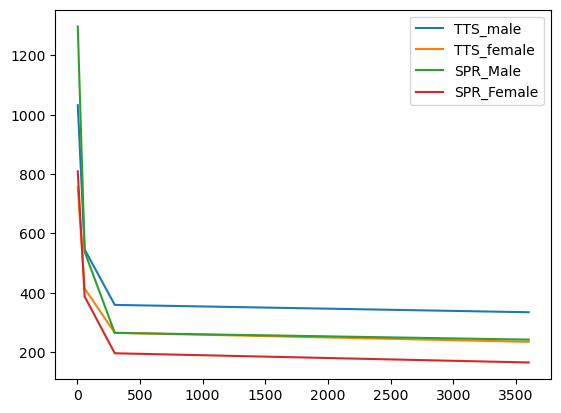

In [243]:
# then plot the power curve
labels = ["TTS_male", "TTS_female", "SPR_Male", "SPR_Female"]
P_actual = [TTS_male, TTS_female, SPR_Male, SPR_Female]
time_actual = [5, 60, 300, 3600]
for i in range(4):
    plt.plot(time_actual, P_actual[i], label=labels[i])

plt.legend(loc='upper right')
plt.show()


Solution (p_max, w, cp): [1249.21641458 8083.63636364  332.50454545]
The values of the three equations: [-2.50111042987555e-12, 0, 0]

Solution (p_max, w, cp): [ 839.05092858 9981.81831255  232.22727269]
The values of the three equations: [1.13686837721616e-13, 0, 0]

Solution (p_max, w, cp): [2082.87444425 7445.45454545  240.38181818]
The values of the three equations: [-7.73070496506989e-12, 0, 0]

Solution (p_max, w, cp): [  941.56625286 10145.45454656   162.68181818]
The values of the three equations: [1.13686837721616e-13, 0, 0]



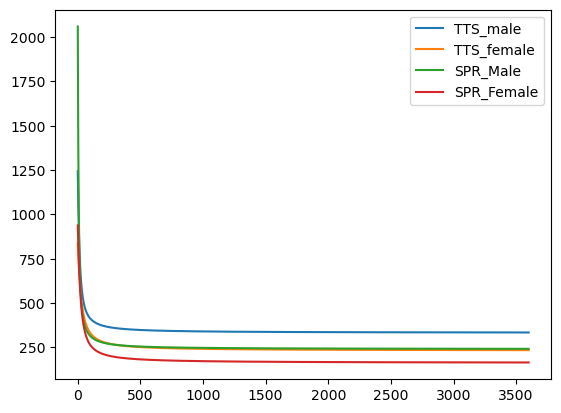

In [244]:
def f(x):
    p_max, w, cp = x
    return [w / t[i] * (1 - exp(-1 * t[i] * (p_max-cp) / w)) + cp - p[i] for i in [0, 2, 3]]


def OmPD(result, T):
    p_max, w, cp = result
    return [w / t * (1 - exp(-1 * t * (p_max-cp) / w)) + cp for t in T]


# The initial data for the preset is referenced from the image in the document 2022 MCM A
for i in range(4):
    t = time_actual
    p = P_actual[i]
    result = fsolve(f, [1200, 18000, 350])
    print("Solution (p_max, w, cp): {}".format(result))
    print("The values of the three equations: {}\n".format(f(result)))
    time_predict = np.linspace(0.1, 3600, num=3600)
    P_predict = OmPD(result, time_predict)
    plt.plot(time_predict, P_predict, label=labels[i])

plt.legend(loc='upper right')
plt.show()
